In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
url2 = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.feature_name"

# loading dataset into Pandas DataFrame
df = pd.read_csv(url,url2 )

df.head()

,"5.1,3.5,1.4,0.2,Iris-setosa"
0,"4.9,3.0,1.4,0.2,Iris-setosa"
1,"4.7,3.2,1.3,0.2,Iris-setosa"
2,"4.6,3.1,1.5,0.2,Iris-setosa"
3,"5.0,3.6,1.4,0.2,Iris-setosa"
4,"5.4,3.9,1.7,0.4,Iris-setosa"


In [4]:
labels = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the labels
x = df.loc[:, labels].values

# Separating out the target
y = df.loc[:,['target']].values


# Standardizing the features
x = StandardScaler().fit_transform(x)

pd.DataFrame(data = x, columns = labels).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [5]:
#PCA projection

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


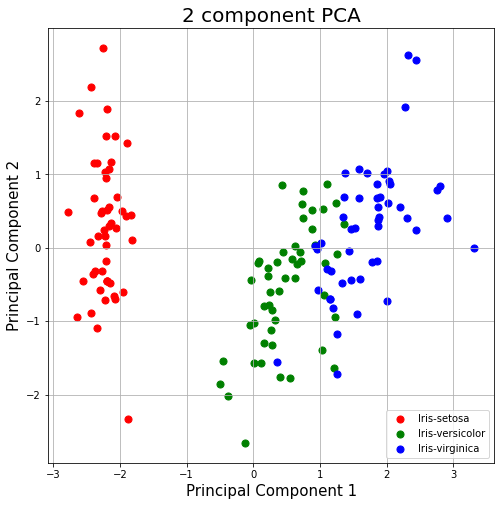

In [6]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

#2d visualization projection
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [7]:

pca.explained_variance_ratio_

array([0.72770452, 0.23030523])